### Gather

In [71]:
# Import package
import tweepy, json
import pandas as pd

### Create a dataframe from the twitter archive

In [72]:
df = pd.read_csv('twitter-archive-enhanced.csv')

In [73]:
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None
1399,699691744225525762,NaN,NaN,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He's a tropical pup. Short lil l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699691744...,5,10,Dave,None,None,None,None
1461,694925794720792577,NaN,NaN,2016-02-03 16:49:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Please only send in dogs. This t-rex is very s...,NaN,NaN,NaN,https://vine.co/v/iJvUqWQ166L,5,10,None,None,None,None,None
1508,691483041324204033,NaN,NaN,2016-01-25 04:49:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691483041...,5,10,None,None,None,None,None
1583,687102708889812993,NaN,NaN,2016-01-13 02:43:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Army of water dogs here. None of them know whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687102708...,5,10,None,None,None,None,None
1618,684969860808454144,6.849598e+17,4.196984e+09,2016-01-07 05:28:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","For those who claim this is a goat, u are wron...",NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1619,684959798585110529,NaN,NaN,2016-01-07 04:48:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a neat dog. No legs (tragi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684959798...,5,10,Jerry,None,None,None,None
1624,684880619965411328,NaN,NaN,2016-01-06 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a basking dino pupper. Looks powe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684880619...,5,10,None,None,None,pupper,None


### Download the file 'image_predictions.tsv' programmatically from the Udacity servers using the Requests Library.



In [10]:
import os
import requests
folder_name = 'image_predictions'

#Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)


In [11]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response 

<Response [200]>

In [12]:
with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb')as file:
    file.write(response.content)

In [13]:
os.listdir(folder_name)

['image-predictions.tsv']

## Create a images dataframe

In [120]:
images = pd.read_table('image_predictions/image-predictions.tsv')

In [6]:
images.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

In [12]:
# Store OAuth authentication credentials in relevant variables
access_token = ""
access_token_secret = ""
consumer_key = ""
consumer_secret = ""


In [13]:
# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [14]:
api = tweepy.API(auth, wait_on_rate_limit= True,
                wait_on_rate_limit_notify= True)

In [15]:
# this tweepy code was obtained from 
#https://github.com/susanli2016/udacity-data-analyst
tweet_id = list(df.tweet_id)
tweet_data = {}
for tweet in tweet_id:
    try:
        tweet_status = api.get_status(tweet,
                                     wait_on_rate_limit = True,
                                     wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except:
        print ("Error:" + str(tweet))

Error:888202515573088257
Error:873697596434513921
Error:869988702071779329
Error:866816280283807744
Error:861769973181624320
Error:842892208864923648
Error:827228250799742977
Error:802247111496568832
Error:775096608509886464
Rate limit reached. Sleeping for: 716
Rate limit reached. Sleeping for: 717


In [40]:
with open('json_tweets.txt', 'w') as json_file:
    json.dump(tweet_data, json_file,
             sort_keys = True,
             indent = 4,
             ensure_ascii = False) 

### Create a tweets dataframe

In [119]:
tweets = pd.read_json('json_tweets.txt', orient='index')

In [8]:
tweets.head(2)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2530,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,520,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,130,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."


### Assess the data

In [7]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
605        1
1446       1
1869       1
2091       1
2038       1
1940       1
1764       2
2310       2
1761       2
1920       2
2246       2
2237       2
2349       2
2326       2
2079       2
2305       3
1249       3
1898       3
1478       3
1692       3
2202       3
765        3
1928       3
1314       3
2183       3
        ... 
866       14
83        14
291       15
285       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [12]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [74]:
df[df['rating_numerator']==5]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None
1399,699691744225525762,NaN,NaN,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He's a tropical pup. Short lil l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699691744...,5,10,Dave,None,None,None,None
1461,694925794720792577,NaN,NaN,2016-02-03 16:49:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Please only send in dogs. This t-rex is very s...,NaN,NaN,NaN,https://vine.co/v/iJvUqWQ166L,5,10,None,None,None,None,None
1508,691483041324204033,NaN,NaN,2016-01-25 04:49:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691483041...,5,10,None,None,None,None,None
1583,687102708889812993,NaN,NaN,2016-01-13 02:43:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Army of water dogs here. None of them know whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687102708...,5,10,None,None,None,None,None
1618,684969860808454144,6.849598e+17,4.196984e+09,2016-01-07 05:28:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","For those who claim this is a goat, u are wron...",NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1619,684959798585110529,NaN,NaN,2016-01-07 04:48:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a neat dog. No legs (tragi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684959798...,5,10,Jerry,None,None,None,None
1624,684880619965411328,NaN,NaN,2016-01-06 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a basking dino pupper. Looks powe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684880619...,5,10,None,None,None,pupper,None


In [76]:
# check location 1689
df.iloc[1689][5]

"I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace"

In [77]:
df[df['rating_numerator']>=15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [88]:
print (df.iloc[313][5] ,'Rating:', df.iloc[313][10])

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho Rating: 960


In [89]:
print (df.iloc[340][5] ,'Rating:', df.iloc[340][10])

RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu… Rating: 75


In [90]:
print (df.iloc[433][5] ,'Rating:', df.iloc[433][10])

The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd Rating: 84


In [92]:
print (df.iloc[695][5] ,'Rating:', df.iloc[695][10])

This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS Rating: 75


In [93]:
print (df.iloc[763][5] ,'Rating:', df.iloc[763][10])

This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq Rating: 27


In [106]:
print (df.iloc[1712][5] ,'Rating:', df.iloc[1712][10])

Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD Rating: 26


In [109]:
print (df.iloc[2074][5] ,'Rating:', df.iloc[2074][10])

After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY Rating: 420


In [9]:
df.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
1574     10
1573     10
1572     10
1563     10
1570     10
1569     10
1568     10
1567     10
1566     10
1565     10
1564     10
1577     10
1571     10
0        10
1562     10
1547     10
1548     10
1549     10
1550     10
1551     10
1552     10
1553     10
1554     10
1555     10
1556     10
       ... 
782      10
781      10
775      10
799      10
780      10
779      10
776      10
777      10
778      10
800      10
784      11
1068     11
1662     11
342      15
1663     16
1165     20
1598     20
1433     40
1202     50
1351     50
1274     50
433      70
1843     80
1254     80
1228     90
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [11]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
images.shape

(2075, 12)

In [11]:
tweets.shape

(2347, 30)

In [8]:
tweets

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2530,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,520,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,130,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,126,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,46,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,304,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,143,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,108,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:05:58.794694657,NaN,NaN,2015-11-16 00:30:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/fv...,134,0,NaN,666050758794694656,666050758794694656,...,NaN,NaN,NaN,59,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:24:13.826850816,NaN,NaN,2015-11-16 00:35:11,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/v5...,1240,0,NaN,666051853826850816,666051853826850816,...,NaN,NaN,NaN,866,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:25:25.042405380,NaN,NaN,2015-11-16 00:49:46,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/rd...,445,0,NaN,666055525042405376,666055525042405376,...,NaN,NaN,NaN,258,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:51:30.499244032,NaN,NaN,2015-11-16 00:55:59,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/yW...,302,0,NaN,666057090499244032,666057090499244032,...,NaN,NaN,NaN,144,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-09 00:16:40.524156928,NaN,NaN,2015-11-16 01:01:59,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/pY...,115,0,NaN,666058600524156928,666058600524156928,...,NaN,NaN,NaN,58,0,NaN,"<a href=""htt

### Quality

#### df table
- Timestamp is an object not a datetime
- Both the time and date are in the same column
- The name column has incorrect names such as 'a', 'the'.
- There are 181 that have a retweeted_status_id.
- There are extraneous rows that need to be removed.
- Index 1689 has a dog that is rated as a 5. The dog's rating is actually 9.5.
- Index 313 is 980 when the rating should actually be 13.
- Index 340 rating numerator is 75 when it should be 9.75.
- Index 695 rating numerator is 75 when it should be 9.75
- Index 763 rating numrator is incorrect.
- Index 1202 rating numerator is 50 and should be 11.
- Index 1712 rating numerator is 26 and should be 11.26.

#### image table
- The p1, p2, and p3 have inconsistent capitalization of the dog names.
- Underscores are used as spaces for dog names.
- The alogorithm does not identify the dog breed correctly.
- There are extraneous rows that need to be removed.

#### tweets table
- The id column needs to be changed to tweet_id.
- The id column is not a string.
- There are 172 rows that have retweeted_status.
- There are extraneous rows that need to be removed.


### Tidyness
- The dog stages are variables and are in more than one column.
- The tweet_id is not a string.

### In general 
- Merge all three datasets

## Cleaning the data

#### Create copies of dataframes

In [121]:
df_clean = df.copy()

images_clean = images.copy()
tweets_clean = tweets.copy()

# Clean the df data frame

#### Define
Change the timestamp column to a datetime

#### Code

In [122]:
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

#### Test

In [123]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

#### Define 

Fix all rating_denominators that have been determined to be incorrectly calculated.

- Index 313 is 960 when the rating should actually be 13.
- Index 340 rating numerator is 75 when it should be 9.75.
- Index 695 rating numerator is 75 when it should be 9.75
- Index 763 rating numerator is 27 when it should be 11.27.
- Index 1202 rating numerator is 50 and should be 11.
- Index 1689 has a dog that is rated as a 5. The dog's rating is actually 9.5.
- Index 1712 rating numerator is 26 and should be 11.26.

#### Code

In [133]:
df_clean.iloc[313, 10] = 13

In [135]:
df_clean.iloc[340, 10] = 9.75
df_clean.iloc[695, 10] = 9.75
df_clean.iloc[763, 10] = 11.27
df_clean.iloc[1202, 10] = 11
df_clean.iloc[1689,10] = 9.5
df_clean.iloc[1712, 10] = 11.26

#### Test

In [136]:
df_clean.iloc[340, 10]
df_clean.iloc[695, 10]
df_clean.iloc[763, 10] 
df_clean.iloc[1202, 10] 
df_clean.iloc[1689,10]
df_clean.iloc[1712, 10]

11.26

#### Define

Change the names in the name column that are incorrect names such as 'a', 'the'.

#### Code

In [137]:
df_clean.name = df_clean.name.replace('a', 'None')
df_clean.name = df_clean.name.replace('the', 'None')
df_clean.name = df_clean.name.replace('an', 'None')
df_clean.name = df_clean.name.replace('this', 'None')
df_clean.name = df_clean.name.replace('very', 'None')

#### Test

In [138]:
df_clean.name.value_counts()

None         821
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
Sadie          8
Bailey         7
Daisy          7
Buddy          7
Toby           7
Oscar          6
Rusty          6
Leo            6
Koda           6
Jack           6
Dave           6
Stanley        6
Milo           6
Scout          6
Jax            6
Bella          6
Chester        5
Oakley         5
Sammy          5
George         5
            ... 
Gordon         1
Timofy         1
Bronte         1
Strudel        1
Spanky         1
Katie          1
Barry          1
Yoda           1
Petrick        1
Nugget         1
Monty          1
Ferg           1
Schnozz        1
Jareld         1
Freddery       1
Leonard        1
Mike           1
Grizzwald      1
Acro           1
Maude          1
Lulu           1
Tassy          1
Sailer         1
Aldrick        1
Lipton         1
Sweets         1
Kody           1
Clarkus       

#### Define
Remove the 181 rows that have a retweeted_status_id.

#### Code

In [139]:
df_clean = df_clean[df_clean['retweeted_status_id'].isnull()]

#### Test

In [140]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), f

In [141]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None


# Tidyness

#### Define
Convert tweet_id into string

#### Code

In [142]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)

#### Test

In [143]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), 

#### Define 

#### Drop the columns that are not needed.


In [144]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), 

#### Code

In [145]:
df_clean.drop(['in_reply_to_status_id',
              'in_reply_to_user_id',
              'source',
              'retweeted_status_id',
              'retweeted_status_timestamp',
              'expanded_urls',
              'text'], axis =1, inplace = True)

In [146]:
df_clean.drop('retweeted_status_user_id', axis =1, inplace=True)

#### Test

In [147]:
df_clean.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,13.0,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,13.0,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,12.0,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,13.0,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,12.0,10,Franklin,None,None,None,None


#### Define 
Melt the stage columns into a single stage column.

#### Code

In [148]:
df_clean = pd.melt(df_clean, id_vars = ['tweet_id', 'timestamp',
                             'rating_numerator', 
                             'rating_denominator',
                             'name'], 
                                 value_name = 'stage')

In [149]:
df_clean = df_clean.drop_duplicates(['tweet_id'], keep='first')

In [150]:
df_clean.drop('variable', axis =1, inplace=True)

#### Test

In [151]:
df_clean.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,13.0,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,13.0,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,12.0,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,13.0,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,12.0,10,Franklin,None


In [152]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 6 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null int64
name                  2175 non-null object
stage                 2175 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 118.9+ KB


#### Define 
Split the timestamp column into date and time columns

#### Code

In [153]:
df_clean['date'] = df_clean['timestamp'].dt.date
df_clean['time'] = df_clean['timestamp'].dt.time

In [154]:
df_clean = df_clean.drop('timestamp', axis=1)

#### Test

In [155]:
df_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,stage,date,time
0,892420643555336193,13.0,10,Phineas,None,2017-08-01,16:23:56
1,892177421306343426,13.0,10,Tilly,None,2017-08-01,00:17:27
2,891815181378084864,12.0,10,Archie,None,2017-07-31,00:18:03
3,891689557279858688,13.0,10,Darla,None,2017-07-30,15:58:51
4,891327558926688256,12.0,10,Franklin,None,2017-07-29,16:00:24


# Clean the images data frame

In [156]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define

- Remove the underscores in the dog names.
- Capitalize the p1, p2, and p3 column for the dog names.


#### Code 

In [157]:
# fix the p1 column
images_clean['p1'] = images_clean['p1'].str.replace('_', ' ')

In [158]:
# fix the p2 column
images_clean['p2'] = images_clean['p2'].str.replace('_', ' ')

In [159]:
# fix the p3 column
images_clean['p3'] = images_clean['p3'].str.replace('_', ' ')

In [160]:
images_clean['p1'] = images.p1.str.title()

In [161]:
images_clean['p2'] = images.p2.str.title()

In [162]:
# fix the p3 column
images_clean['p3'] = images.p3.str.title()

#### Test

In [163]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [164]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Define 
Convert tweet_id into a string

#### Code

In [165]:
images_clean.tweet_id = images_clean.tweet_id.astype(str)

#### Test

In [166]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


# Clean the tweets data frame

#### Define
Rename the id column to tweet_id

#### Code

In [167]:
tweets_clean = tweets_clean.rename(columns={'id': 'tweet_id'})

#### Test

In [168]:
tweets_clean.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,tweet_id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2530,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,520,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,130,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,126,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,46,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,304,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,143,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,108,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


In [169]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2347 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2347 non-null datetime64[ns]
entities                         2347 non-null object
extended_entities                1825 non-null object
favorite_count                   2347 non-null int64
favorited                        2347 non-null int64
geo                              0 non-null float64
tweet_id                         2347 non-null int64
id_str                           2347 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  23

#### Define 
Remove the rows that are a retweeted_status

#### Code

In [170]:
tweets_clean = tweets_clean[tweets_clean['retweeted_status'].isnull()]

#### Test

In [171]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2175 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2175 non-null datetime64[ns]
entities                         2175 non-null object
extended_entities                1749 non-null object
favorite_count                   2175 non-null int64
favorited                        2175 non-null int64
geo                              0 non-null float64
tweet_id                         2175 non-null int64
id_str                           2175 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  21

#### Define
Remove the extraneous columns form the data frame

#### Code

In [172]:

tweets_clean.drop(['contributors',
                     'coordinates',
                     'created_at',
                     'entities',
                     'extended_entities',
                     'favorited',
                     'geo',
                     'id_str',
                     'in_reply_to_screen_name',
                     'in_reply_to_status_id',
                     'in_reply_to_status_id_str',
                     'in_reply_to_user_id',
                     'in_reply_to_user_id_str',
                     'is_quote_status',
                     'lang',
                     'place',
                     'possibly_sensitive',
                     'possibly_sensitive_appealable',
                     'quoted_status',
                     'quoted_status_id',
                     'quoted_status_id_str',
                     'retweeted',
                     'retweeted_status',
                     'source',
                     'truncated',
                     'user'], axis=1,inplace=True)

#### Test

In [173]:
tweets_clean.head()

,favorite_count,tweet_id,retweet_count,text
1991-02-08 13:48:08.022790149,2530,666020888022790144,520,Here we have a Japanese Irish Setter. Lost eye...
1991-02-08 16:08:05.002620928,130,666029285002620928,47,This is a western brown Mitsubishi terrier. Up...
1991-02-08 17:16:52.701032449,126,666033412701032448,46,Here is a very happy pup. Big fan of well-main...
1991-02-08 20:17:06.329800704,304,666044226329800704,143,This is a purebred Piers Morgan. Loves to Netf...
1991-02-08 21:40:48.165822465,108,666049248165822464,40,Here we have a 1949 1st generation vulpix. Enj...


In [174]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2175 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 4 columns):
favorite_count    2175 non-null int64
tweet_id          2175 non-null int64
retweet_count     2175 non-null int64
text              2175 non-null object
dtypes: int64(3), object(1)
memory usage: 85.0+ KB


#### Define 
The tweet_id must be converted to a string

#### Code

In [175]:
tweets_clean.tweet_id = tweets_clean.tweet_id.astype(str)

#### Test 

In [176]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2175 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 4 columns):
favorite_count    2175 non-null int64
tweet_id          2175 non-null object
retweet_count     2175 non-null int64
text              2175 non-null object
dtypes: int64(2), object(2)
memory usage: 85.0+ KB


# Merge the data frames

#### Define 
Merge the dataframes to make one consilidated dataframe

#### Code

In [177]:
tweets_merge = pd.merge(df_clean, tweets_clean, on='tweet_id', how='inner')

In [178]:
tweets_merge = pd.merge(tweets_merge, images_clean, on='tweet_id', how='inner')

In [179]:
df_merge = pd.merge(df_clean, tweets_clean, on='tweet_id')

In [180]:
df_merge = pd.merge(df_merge, images_clean, on='tweet_id')

In [181]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 21 columns):
tweet_id              1300 non-null object
rating_numerator      1300 non-null float64
rating_denominator    1300 non-null int64
name                  1300 non-null object
stage                 1300 non-null object
date                  1300 non-null object
time                  1300 non-null object
favorite_count        1300 non-null int64
retweet_count         1300 non-null int64
text                  1300 non-null object
jpg_url               1300 non-null object
img_num               1300 non-null int64
p1                    1300 non-null object
p1_conf               1300 non-null float64
p1_dog                1300 non-null bool
p2                    1300 non-null object
p2_conf               1300 non-null float64
p2_dog                1300 non-null bool
p3                    1300 non-null object
p3_conf               1300 non-null float64
p3_dog                1300 non-null b

#### Test 

In [182]:
tweets_merge.head()

,tweet_id,rating_numerator,rating_denominator,name,stage,date,time,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,12.0,10,Archie,None,2017-07-31,00:18:03,25267,4245,This is Archie. He is a rare Norwegian Pouncin...,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,891689557279858688,13.0,10,Darla,None,2017-07-30,15:58:51,42502,8802,This is Darla. She commenced a snooze mid meal...,...,1,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
2,891327558926688256,12.0,10,Franklin,None,2017-07-29,16:00:24,40666,9586,This is Franklin. He would like you to stop ca...,...,2,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True
3,891087950875897856,13.0,10,None,None,2017-07-29,00:08:17,20402,3180,Here we have a majestic great white breaching ...,...,1,Chesapeake_Bay_Retriever,0.425595,True,Irish_Terrier,0.116317,True,Indian_Elephant,0.076902,False
4,890729181411237888,13.0,10,None,None,2017-07-28,00:22:40,66149,19291,When you watch your owner call another dog a g...,...,2,Pomeranian,0.566142,True,Eskimo_Dog,0.178406,True,Pembroke,0.076507,True


# Storing, Analyzing, and Visualizing Data for this Project

### Store the master file

In [183]:
tweets_merge.to_csv('twitter_archive_master.csv')

### Analyze the master file

In [184]:
import pandas as pd
# read in the master file
twitter = pd.read_csv('twitter_archive_master.csv')

In [185]:
twitter.head()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,name,stage,date,time,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,891815181378084864,12.0,10,Archie,None,2017-07-31,00:18:03,25267,4245,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,1,891689557279858688,13.0,10,Darla,None,2017-07-30,15:58:51,42502,8802,...,1,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
2,2,891327558926688256,12.0,10,Franklin,None,2017-07-29,16:00:24,40666,9586,...,2,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True
3,3,891087950875897856,13.0,10,None,None,2017-07-29,00:08:17,20402,3180,...,1,Chesapeake_Bay_Retriever,0.425595,True,Irish_Terrier,0.116317,True,Indian_Elephant,0.076902,False
4,4,890729181411237888,13.0,10,None,None,2017-07-28,00:22:40,66149,19291,...,2,Pomeranian,0.566142,True,Eskimo_Dog,0.178406,True,Pembroke,0.076507,True


In [186]:
### There is an Unnamed column that is not necessary and should be dropped.]

twitter.drop('Unnamed: 0', axis = 1, inplace = True)

In [65]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 21 columns):
tweet_id              1300 non-null int64
rating_numerator      1300 non-null int64
rating_denominator    1300 non-null int64
name                  1300 non-null object
stage                 1300 non-null object
date                  1300 non-null object
time                  1300 non-null object
favorite_count        1300 non-null int64
retweet_count         1300 non-null int64
text                  1300 non-null object
jpg_url               1300 non-null object
img_num               1300 non-null int64
p1                    1300 non-null object
p1_conf               1300 non-null float64
p1_dog                1300 non-null bool
p2                    1300 non-null object
p2_conf               1300 non-null float64
p2_dog                1300 non-null bool
p3                    1300 non-null object
p3_conf               1300 non-null float64
p3_dog                1300 non-null bool

In [187]:
twitter.tweet_id = twitter.tweet_id.astype(str)

In [188]:
twitter['date'] = pd.to_datetime(twitter['date'])

In [189]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 21 columns):
tweet_id              1300 non-null object
rating_numerator      1300 non-null float64
rating_denominator    1300 non-null int64
name                  1300 non-null object
stage                 1300 non-null object
date                  1300 non-null datetime64[ns]
time                  1300 non-null object
favorite_count        1300 non-null int64
retweet_count         1300 non-null int64
text                  1300 non-null object
jpg_url               1300 non-null object
img_num               1300 non-null int64
p1                    1300 non-null object
p1_conf               1300 non-null float64
p1_dog                1300 non-null bool
p2                    1300 non-null object
p2_conf               1300 non-null float64
p2_dog                1300 non-null bool
p3                    1300 non-null object
p3_conf               1300 non-null float64
p3_dog                1300 no

In [190]:
twitter.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1.300000e+03,1.300000e+03
mean,12.780785,10.545385,8349.132308,2561.209231,1.186923,0.587045,1.371542e-01,6.144363e-02
std,51.097403,7.871481,11508.629437,4086.036122,0.540562,0.273533,1.018995e-01,5.200750e-02
min,1.000000,2.000000,80.000000,14.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,1735.500000,593.750000,1.000000,0.354718,5.440723e-02,1.649338e-02
50%,11.000000,10.000000,3877.000000,1285.000000,1.000000,0.579762,1.203825e-01,4.961540e-02
75%,12.000000,10.000000,10359.000000,3043.750000,1.000000,0.836836,1.987905e-01,9.470035e-02
max,1776.000000,170.000000,123880.000000,61884.000000,4.000000,1.000000,4.676780e-01,2.710420e-01


### Initial findings

- The 'rating_numerator' has a mean of 12.78 and there is a max value of 1776.
- The average for 'retweet_count' is 2561 with a max value of 61884.
- The 'favorite_count' has a mean of 8349 and a max value of 123880.

### Investigate the identity of the dog with the highest 'favorite_count'

In [191]:
twitter.loc[twitter.favorite_count == 123880]

,tweet_id,rating_numerator,rating_denominator,name,stage,date,time,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
232,807106840509214720,13.0,10,Stephan,None,2016-12-09,06:17:20,123880,61884,This is Stephan. He just wants to help. 13/10 ...,...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,Toy_Terrier,0.077008,True


In [192]:
# Find the link and view the dog's picture.
twitter.iloc[232, 10]
twitter.iloc[232, 9]

'This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d'

#### Finding
His name is Stephan and he is classified as a Chihuahua(.50537), Pomeranian (0.12035), and Toy Terrier (0.077008) 

### Investigate the identity of the dog with the highest 'rating_numerator'

In [13]:
twitter.loc[twitter.favorite_count >= 79000]

,tweet_id,rating_numerator,rating_denominator,name,stage,date,time,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
42,877736472329191424,13,10,Aja,None,2017-06-22,03:54:17,80801,19672,This is Aja. She was just told she's a good do...,...,2,Chesapeake Bay Retriever,0.837956,True,Labrador Retriever,0.062034,True,Weimaraner,0.040599,True
61,870374049280663552,13,10,Zoey,None,2017-06-01,20:18:38,84076,27183,This is Zoey. She really likes the planet. Wou...,...,1,Golden Retriever,0.841001,True,Great Pyrenees,0.099278,True,Labrador Retriever,0.032621,True
85,859196978902773760,12,10,quite,None,2017-05-02,00:04:57,93442,32211,We only rate dogs. This is quite clearly a smo...,...,1,Angora,0.224218,False,Malamute,0.216163,True,Persian Cat,0.128383,False
190,819004803107983360,14,10,Bo,doggo,2017-01-11,02:15:36,94385,41476,This is Bo. He was a very good First Doggo. 14...,...,1,Standard Poodle,0.351308,True,Toy Poodle,0.271929,True,Tibetan Terrier,0.094759,True
232,807106840509214720,13,10,Stephan,None,2016-12-09,06:17:20,123880,61884,This is Stephan. He just wants to help. 13/10 ...,...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True
938,676219687039057920,10,10,Kenneth,None,2015-12-14,01:58:31,79069,34065,This is Kenneth. He's stuck in a bubble. 10/10...,...,1,Bubble,0.997556,False,Leafhopper,0.000159,False,Whippet,0.000132,True


In [14]:
twitter.iloc[190, 10]
#twitter.iloc[452, 9]

'https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg'

#### Finding
His name is Atticus and his breed was not correctly classified by the algorithm.  The 1776 is perhaps in homage to 4th of July. 

## Investigate the identity of the dog with the lowest 'rating_denominator'

In [15]:
twitter.loc[twitter.rating_numerator == 1]

,tweet_id,rating_numerator,rating_denominator,name,stage,date,time,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
966,675153376133427200,1,10,None,None,2015-12-11,03:21:23,6697,2856,What kind of person sends in a picture without...,...,1,Paper Towel,0.327957,False,Mailbox,0.096027,False,Seat Belt,0.034995,False
1235,667549055577362432,1,10,None,None,2015-11-20,03:44:31,6047,2428,Never seen dog like this. Breathes heavy. Tilt...,...,1,Electric Fan,0.984377,False,Spotlight,0.007737,False,Lampshade,0.001901,False
1287,666287406224695296,1,2,None,None,2015-11-16,16:11:11,151,69,This is an Albanian 3 1/2 legged Episcopalian...,...,1,Maltese Dog,0.857531,True,Toy Poodle,0.063064,True,Miniature Poodle,0.025581,True
1290,666104133288665088,1,10,None,None,2015-11-16,04:02:55,14557,6751,Not familiar with this breed. No tail (weird)....,...,1,Hen,0.965932,False,Cock,0.033919,False,Partridge,0.000052,False


In [15]:
twitter.iloc[1290, 10]
twitter.iloc[1290, 9]

"Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX"

In [17]:
twitter.iloc[1287, 10]

'https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg'

In [18]:
twitter.iloc[1235, 10]

'https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg'

#### Findings 
One is a chicken and the other is a fan.  Looks like someone is trying to play a prank.

## Investigate the most popular breed.

In [19]:
twitter.p1.value_counts()[0:6]

Golden Retriever      95
Pembroke              65
Labrador Retriever    62
Chihuahua             45
Pug                   39
Pomeranian            26
Name: p1, dtype: int64

In [20]:
twitter.p2.value_counts()[0:6]

Labrador Retriever    61
Golden Retriever      54
Cardigan              53
Chihuahua             31
French Bulldog        28
Pomeranian            27
Name: p2, dtype: int64

#### Finding
It seems like the most popular breeds are Golden Retriever, Labrador Retriever, and Chihuahua

## Investigate the most popular name.

In [54]:
twitter.name.value_counts()[1:20]

Oliver      8
Tucker      7
Winston     7
Cooper      6
Lucy        6
Penny       6
Bailey      5
Sadie       5
Lola        5
Bella       5
Toby        5
Sophie      4
Clark       4
Clarence    4
Dexter      4
Rusty       3
Larry       3
Chip        3
George      3
Name: name, dtype: int64

#### Finding
There were 421 dogs in the dataset with an unknown name.  Oliver, Winston and Tucker are the most popular names.

In [193]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 21 columns):
tweet_id              1300 non-null object
rating_numerator      1300 non-null float64
rating_denominator    1300 non-null int64
name                  1300 non-null object
stage                 1300 non-null object
date                  1300 non-null datetime64[ns]
time                  1300 non-null object
favorite_count        1300 non-null int64
retweet_count         1300 non-null int64
text                  1300 non-null object
jpg_url               1300 non-null object
img_num               1300 non-null int64
p1                    1300 non-null object
p1_conf               1300 non-null float64
p1_dog                1300 non-null bool
p2                    1300 non-null object
p2_conf               1300 non-null float64
p2_dog                1300 non-null bool
p3                    1300 non-null object
p3_conf               1300 non-null float64
p3_dog                1300 no

# Visualize the twitter data

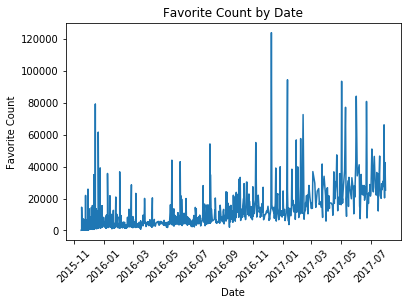

In [195]:
twitter = twitter.sort_values('date',ascending=True)
plt.plot(twitter.date, twitter.favorite_count)
plt.xticks(rotation='45');
plt.xlabel("Date");
plt.ylabel('Favorite Count');
plt.title('Favorite Count by Date');

#### Finding
The Favorite count fluctuates with large spites during December.

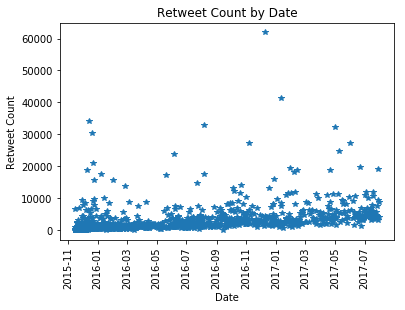

In [196]:
twitter = twitter.sort_values('date',ascending=True)
plt.plot(twitter.date, twitter.retweet_count, '*')
plt.xticks(rotation='vertical')
plt.xlabel("Date");
plt.ylabel('Retweet Count');
plt.title('Retweet Count by Date');

#### Finding
The retweet_data looks similar to the favorite_count data.

In [197]:
twitter.stage.value_counts()

None     1258
doggo      42
Name: stage, dtype: int64

#### Finding
What happened to the other stages?

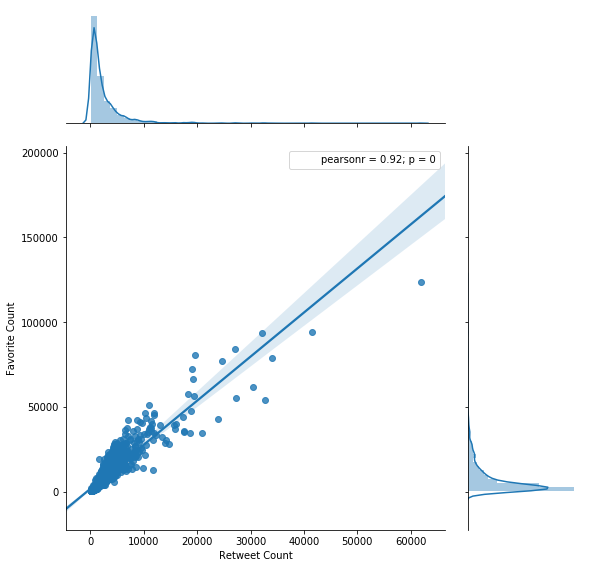

In [198]:
sns.jointplot(x='retweet_count', y='favorite_count',
              data=twitter, kind='reg',
             size = 8, ratio=3).set_axis_labels('Retweet Count', 'Favorite Count');



#### Finding 
There is strong linear relationship between Favorite Count and Retweet Count.

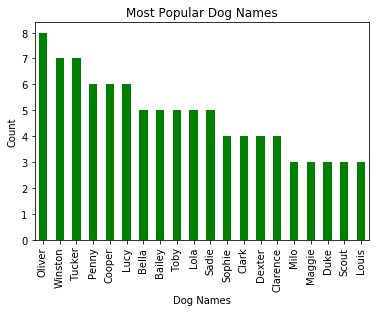

In [199]:
twitter.name.value_counts()[1:21].plot(kind='bar', color = 'green');
plt.xlabel('Dog Names')
plt.ylabel('Count')
plt.title('Most Popular Dog Names');

#### Finding
A display of the top 20 names in the data set.

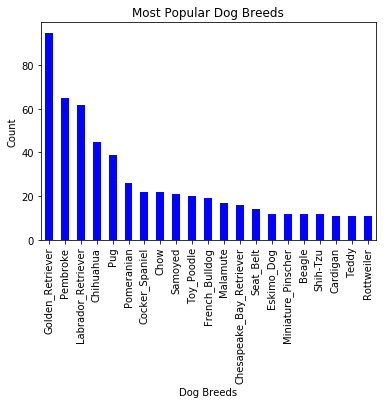

In [200]:
twitter.p1.value_counts()[0:21].plot(kind='bar', color = 'Blue');
plt.xlabel('Dog Breeds')
plt.ylabel('Count')
plt.title('Most Popular Dog Breeds');

In [29]:
twitter.loc[twitter.name == 'Oliver']

,tweet_id,rating_numerator,rating_denominator,name,stage,date,time,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,889278841981685760,13,10,Oliver,None,2017-07-24,00:19:32,25518,5551,This is Oliver. You're witnessing one of his m...,...,1,Whippet,0.626152,True,Borzoi,0.194742,True,Saluki,0.027351,True
186,819952236453363712,13,10,Oliver,None,2017-01-13,17:00:21,5840,1339,This is Oliver. He has dreams of being a servi...,...,1,American Staffordshire Terrier,0.925505,True,Staffordshire Bullterrier,0.036221,True,Italian Greyhound,0.020412,True
410,756998049151549440,11,10,Oliver,None,2016-07-23,23:42:53,6841,2233,This is Oliver. He's an English Creamschnitzel...,...,4,Golden Retriever,0.678555,True,Labrador Retriever,0.072632,True,Border Terrier,0.049033,True
478,745057283344719872,12,10,Oliver,None,2016-06-21,00:54:33,7836,2551,This is Oliver. He's downright gorgeous as hel...,...,2,Shetland Sheepdog,0.963985,True,Collie,0.026206,True,Border Collie,0.004544,True
563,721001180231503872,11,10,Oliver,None,2016-04-15,15:44:11,2717,681,This is Oliver. Bath time is upon him. His fea...,...,1,Samoyed,0.950053,True,Washbasin,0.006321,False,Tub,0.006243,False
627,708356463048204288,10,10,Oliver,None,2016-03-11,18:18:36,3892,1501,This is Oliver. That is his castle. He protect...,...,2,Pug,0.871283,True,French Bulldog,0.041820,True,Bath Towel,0.015228,False
706,698989035503689728,13,10,Oliver,None,2016-02-14,21:55:47,3667,1091,This is Oliver. He does toe touches in his sle...,...,1,Norfolk Terrier,0.246340,True,Irish Terrier,0.243349,True,Golden Retriever,0.085871,True
971,675111688094527488,8,10,Oliver,None,2015-12-11,00:35:44,1022,276,Say hello to Oliver. He thought what was insid...,...,1,Labrador Retriever,0.631501,True,Brittany Spaniel,0.101927,True,Chesapeake Bay Retriever,0.062650,True


In [31]:
twitter.iloc[971,10]

'https://pbs.twimg.com/media/CV56f54WsAEv4kJ.jpg'

### References
These are some of the websites that were helpful for completing this project.
* http://datacamp.com
* https://chrisalbon.com/python/data_wrangling/pandas_delete_duplicates/
* https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
* https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/
* https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
* https://seaborn.pydata.org/generated/seaborn.jointplot.html